In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
from multiprocessing import Pool

import librosa
import librosa.display
from scipy.io import wavfile as wav

import IPython.display as ipd
from IPython.core.display import display

In [2]:
#data ingestion
def fetch_data(data):
    crema_directory_list = os.listdir(data)
    
    audio_path = []
    audio_emotion = []
    for path in crema_directory_list:
        emotion = path.split('_')[2]
        audio_emotion.append(emotion)
        audio_path.append(data + path)

    audio_emotion_df = pd.DataFrame(audio_emotion,columns = ['target_emotion'])
    audio_emotion_df = audio_emotion_df.replace({'ANG':'angry', 'SAD':'sad','DIS':'disgust','HAP':'happy','FEA':'fear','NEU':'neutral'})

    audio_path = pd.DataFrame(audio_path, columns=['path'])

    crema_df = pd.concat([audio_path, audio_emotion_df], axis = 1)
    return crema_df

In [3]:
crema_path = '/Users/hm/Downloads/AudioWAV/'
crema_df = fetch_data(crema_path)
crema_df.head()

,path,target_emotion
0,/Users/hm/Downloads/AudioWAV/1022_ITS_ANG_XX.wav,angry
1,/Users/hm/Downloads/AudioWAV/1037_ITS_ANG_XX.wav,angry
2,/Users/hm/Downloads/AudioWAV/1060_ITS_NEU_XX.wav,neutral
3,/Users/hm/Downloads/AudioWAV/1075_ITS_NEU_XX.wav,neutral
4,/Users/hm/Downloads/AudioWAV/1073_IOM_DIS_XX.wav,disgust


In [4]:
REQUIRED_EMOTIONS = ['angry', 'neutral', 'happy']
crema_df = crema_df[crema_df['target_emotion'].isin(REQUIRED_EMOTIONS)]

In [5]:
print(crema_df.target_emotion.dtype)
crema_df.target_emotion = pd.Categorical(crema_df.target_emotion)
print(crema_df.target_emotion.unique())

object
['angry', 'neutral', 'happy']
Categories (3, object): ['angry', 'happy', 'neutral']


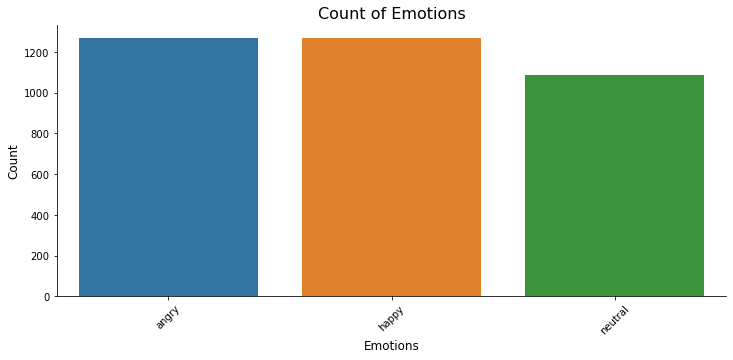

In [6]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(x=crema_df.target_emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [7]:
""" samples_trimmed, _ = librosa.effects.trim(data, top_db=20)
pd.Series(samples_trimmed).plot(figsize=(10, 5), 
                                lw=1, 
                                title='Raw Audio Trimmed Example'
                                ) """

" samples_trimmed, _ = librosa.effects.trim(data, top_db=20)\npd.Series(samples_trimmed).plot(figsize=(10, 5), \n                                lw=1, \n                                title='Raw Audio Trimmed Example'\n                                ) "

In [7]:
def create_waveplot(data, sr, origin, e):
    #plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} audio with {} emotion'.format(origin, e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_mfcc(data, sr, e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    #plt.figure(figsize=(12, 3))
    plt.title('MFCC for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')   
    plt.colorbar()
    plt.show()

def play_audio(path, sr):
    print('Audio file:',path.split('/')[5])
    display(ipd.Audio(path, rate=sr))

def create_melspectrogram(data, sr, e):
    #plt.figure(figsize=(7, 5))
    m_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
    m_spectrogram = librosa.power_to_db(m_spectrogram)
    librosa.display.specshow(m_spectrogram, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('MelSpectrogram for audio with {} emotion'.format(e), size=15)
    plt.colorbar(format='%+2.0f dB')
    plt.show()

Audio file: 1017_MTI_ANG_XX.wav


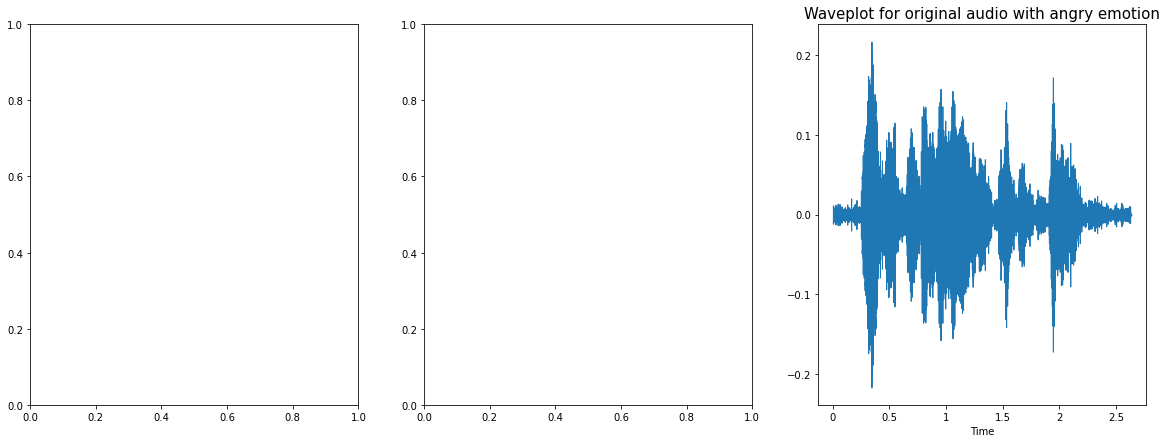

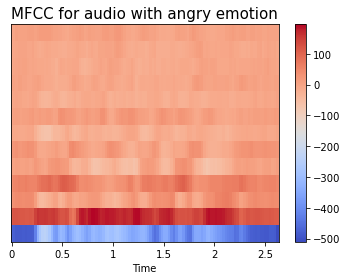

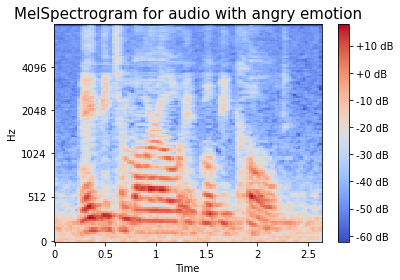

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

emotion = 'angry'
path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
data, sampling_rate = librosa.load(path)

play_audio(path, sampling_rate)

create_waveplot(data, sampling_rate, 'original', emotion)
create_mfcc(data, sampling_rate, emotion)
create_melspectrogram(data, sampling_rate, emotion)

axes[1].set(title='Waveplot for audio with {} emotion'.format(emotion))
axes[1].set(title='MFCC for audio with {} emotion'.format(emotion))
axes[2].set(title='MelSpectrogram for audio with {} emotion'.format(emotion))

plt.show()


Audio file: 1077_DFA_NEU_XX.wav


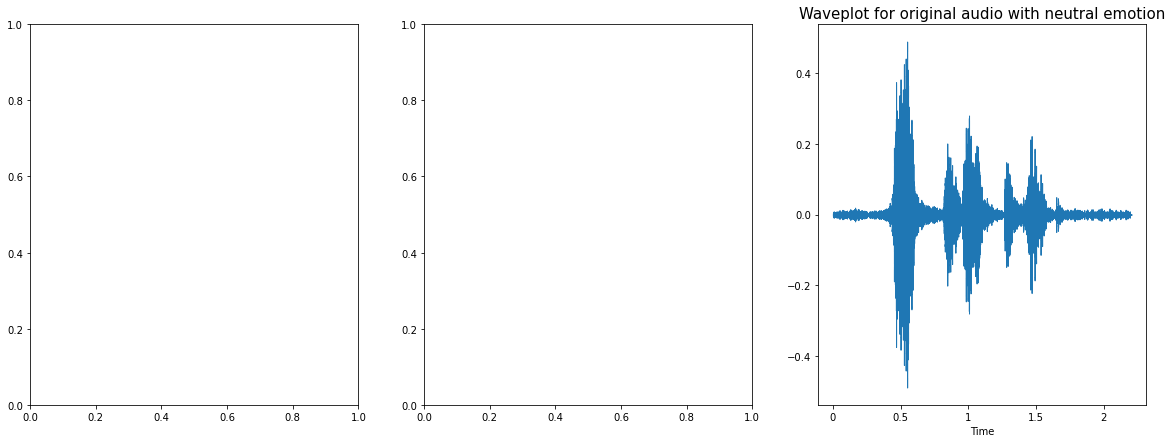

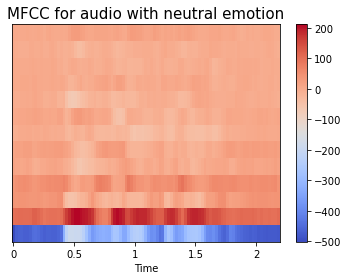

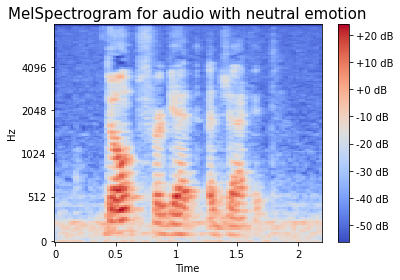

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

emotion = 'neutral'
path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
data, sampling_rate = librosa.load(path)

play_audio(path, sampling_rate)

create_waveplot(data, sampling_rate, 'original', emotion)
create_mfcc(data, sampling_rate, emotion)
create_melspectrogram(data, sampling_rate, emotion)

axes[1].set(title='Waveplot for audio with {} emotion'.format(emotion))
axes[1].set(title='MFCC for audio with {} emotion'.format(emotion))
axes[2].set(title='MelSpectrogram for audio with {} emotion'.format(emotion))

plt.show()


Audio file: 1039_IOM_HAP_XX.wav


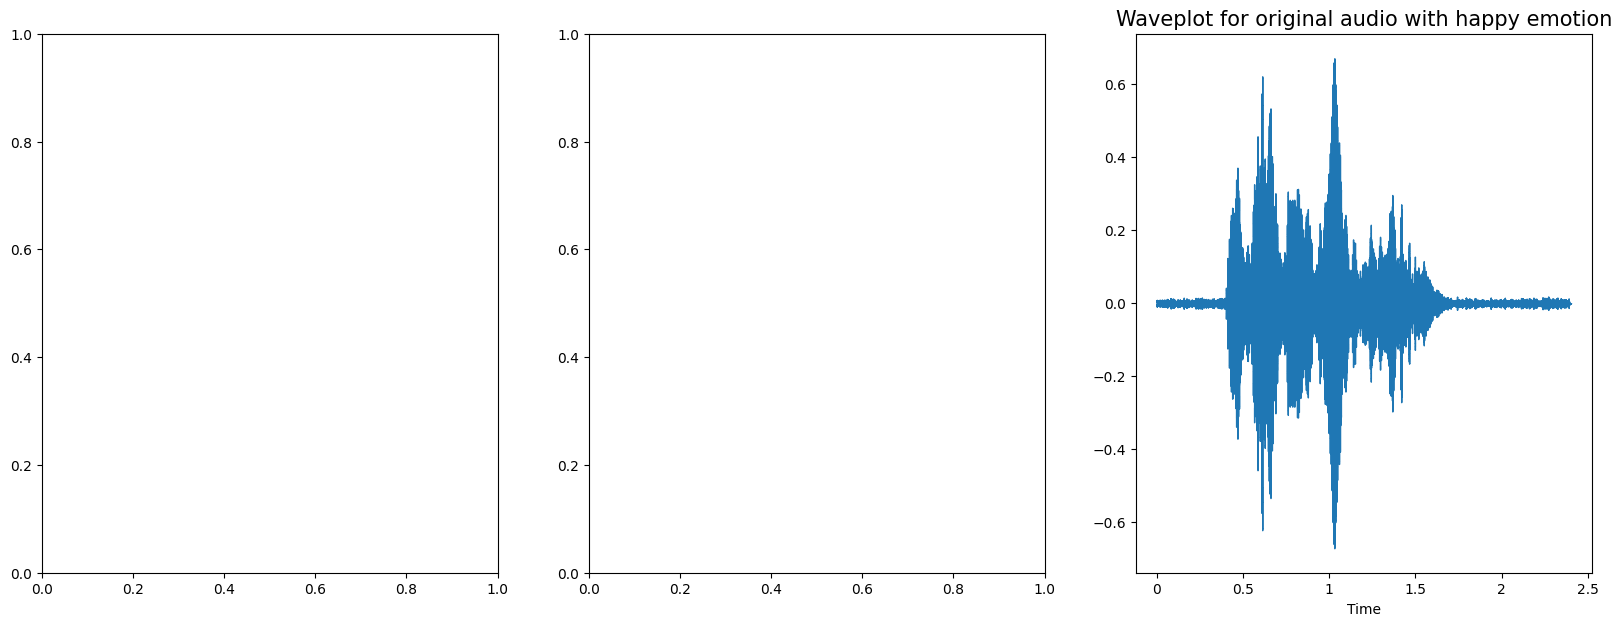

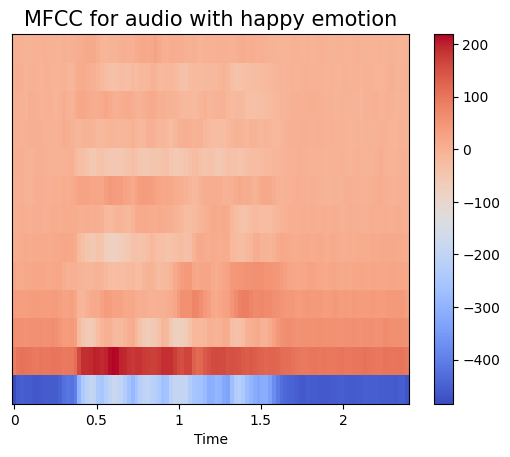

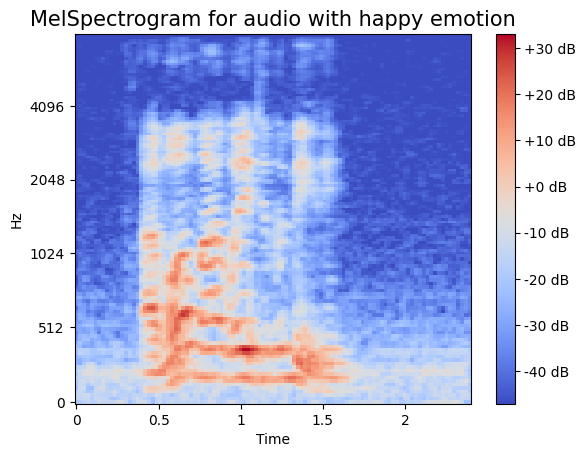

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

emotion = 'happy'
path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
data, sampling_rate = librosa.load(path)

play_audio(path, sampling_rate)

create_waveplot(data, sampling_rate, 'original', emotion)
create_mfcc(data, sampling_rate, emotion)
create_melspectrogram(data, sampling_rate, emotion)

axes[1].set(title='Waveplot for audio with {} emotion'.format(emotion))
axes[1].set(title='MFCC for audio with {} emotion'.format(emotion))
axes[2].set(title='MelSpectrogram for audio with {} emotion'.format(emotion))

plt.show()


Audio file: 1077_IWL_SAD_XX.wav


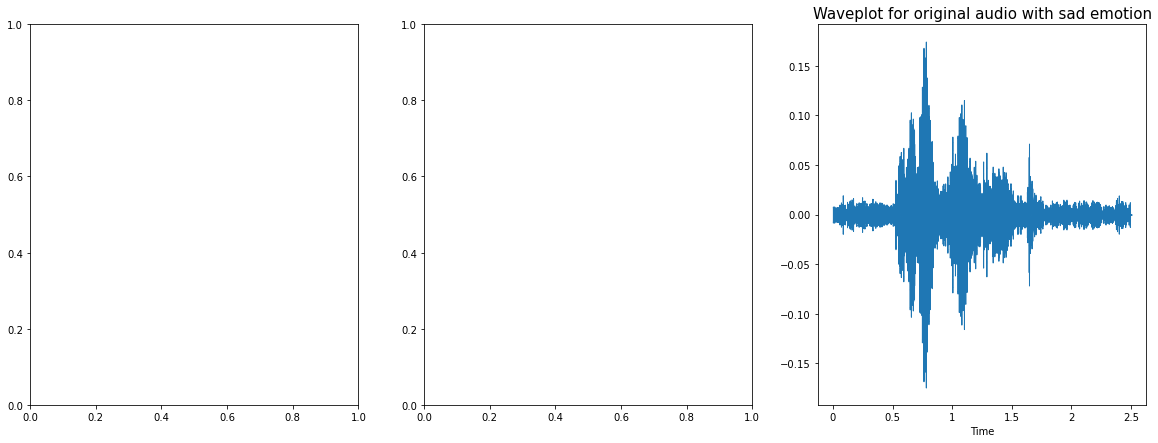

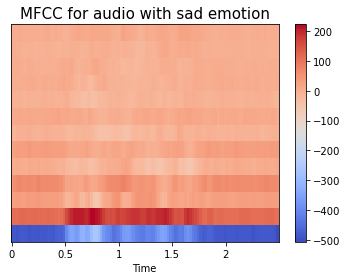

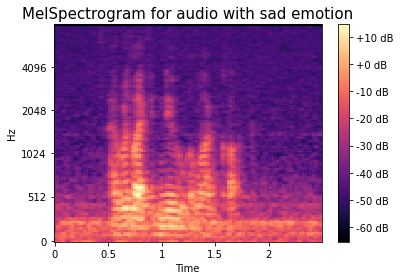

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

emotion = 'sad'
path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
data, sampling_rate = librosa.load(path)

play_audio(path, sampling_rate)

create_waveplot(data, sampling_rate, 'original', emotion)
create_mfcc(data, sampling_rate, emotion)
create_melspectrogram(data, sampling_rate, emotion)

axes[1].set(title='Waveplot for audio with {} emotion'.format(emotion))
axes[1].set(title='MFCC for audio with {} emotion'.format(emotion))
axes[2].set(title='MelSpectrogram for audio with {} emotion'.format(emotion))

plt.show()


Audio file: 1006_IEO_FEA_MD.wav


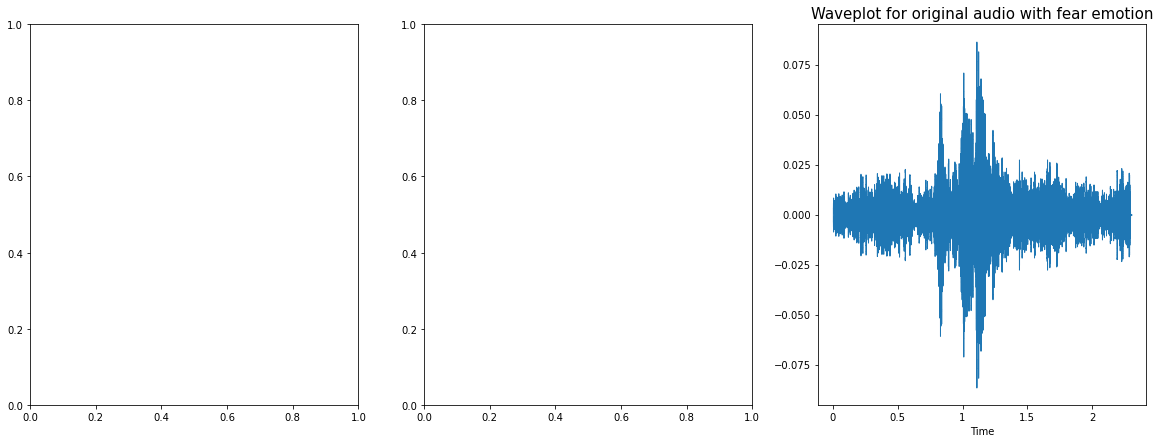

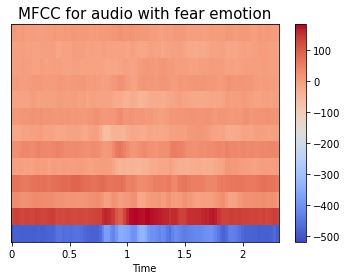

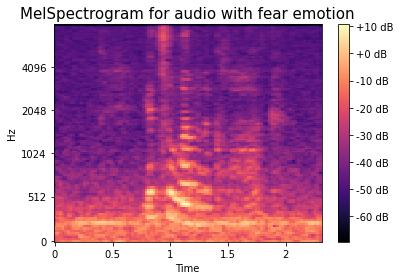

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

emotion = 'fear'
path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
data, sampling_rate = librosa.load(path)

play_audio(path, sampling_rate)

create_waveplot(data, sampling_rate, 'original', emotion)
create_mfcc(data, sampling_rate, emotion)
create_melspectrogram(data, sampling_rate, emotion)

axes[1].set(title='Waveplot for audio with {} emotion'.format(emotion))
axes[1].set(title='MFCC for audio with {} emotion'.format(emotion))
axes[2].set(title='MelSpectrogram for audio with {} emotion'.format(emotion))

plt.show()


Audio file: 1077_IWW_HAP_XX.wav


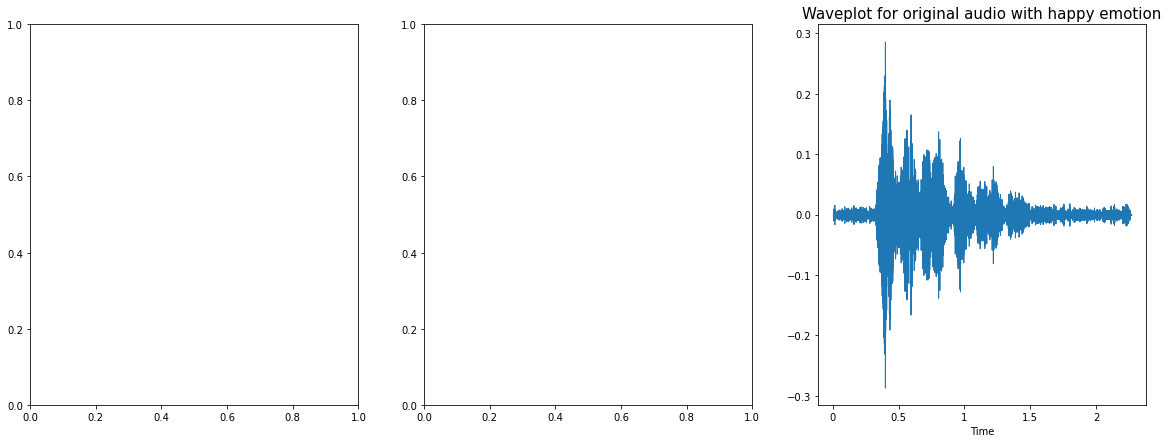

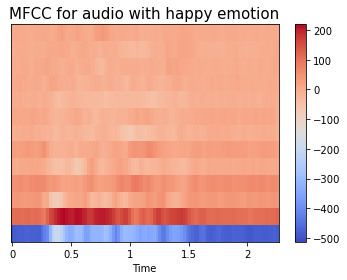

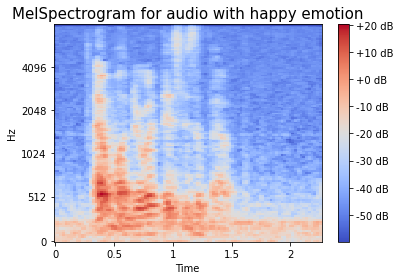

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

emotion = 'happy'
path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
data, sampling_rate = librosa.load(path)

play_audio(path, sampling_rate)

create_waveplot(data, sampling_rate, 'original', emotion)
create_mfcc(data, sampling_rate, emotion)
create_melspectrogram(data, sampling_rate, emotion)

axes[1].set(title='Waveplot for audio with {} emotion'.format(emotion))
axes[1].set(title='MFCC for audio with {} emotion'.format(emotion))
axes[2].set(title='MelSpectrogram for audio with {} emotion'.format(emotion))

plt.show()

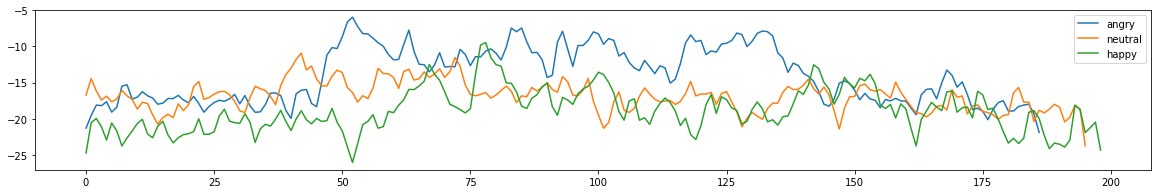

In [10]:
EMOTIONS = ['sad', 'happy', 'fear', 'disgust', 'angry', 'neutral']
 
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)

for emotion in REQUIRED_EMOTIONS:
    path = np.random.choice(crema_df.path[crema_df.target_emotion == emotion])
    data, sample_rate = librosa.load(path,sr=22050*2)  
    female = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    female = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13), axis=0)

# Plot the two audio waves together
    plt.plot(female, label=emotion)

plt.legend()
plt.show()

In [11]:
# NOISE
def noise(data, nf):
    return data + nf * np.random.randn(len(data))
# STRETCH
def stretch(data, stretch_f):
    return librosa.effects.time_stretch(data, rate = stretch_f)
# SHIFT
def shift(data, sampling_rate, shift_r):
    shift_distance = np.random.randint(shift_r[0], shift_r[1])
    return np.roll(data, shift_distance)
# PITCH
def pitch(data, sampling_rate, pitch_f):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_f)

In [12]:
SAMPLE_COUNT = crema_df.shape[0]

# Define the path to the CREMA-D dataset
sample = crema_df.iloc[np.random.randint(SAMPLE_COUNT)]
emotion = sample['target_emotion']
audio_path = sample['path']

# Define the noise parameters
NOISE_FACTOR = 0.05

# Define the stretching and shifting parameters
STRETCH_FACTOR = 0.8
SHIFT_RANGE = [-500, 500]

# Define the pitch parameters
PITCH_FACTOR = 2

data, sample_rate = librosa.load(audio_path)

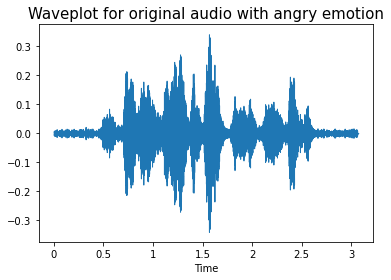

Audio file: 1067_ITH_ANG_XX.wav


In [12]:
create_waveplot(data,sample_rate,'original', emotion)
play_audio(audio_path, sample_rate)

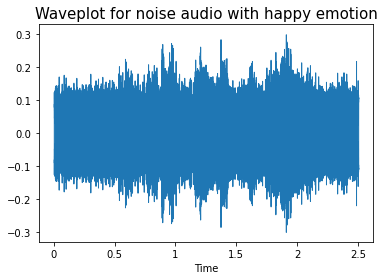

In [13]:
noise_data = noise(data, NOISE_FACTOR)
create_waveplot(noise_data, sample_rate, 'noise', emotion)
ipd.Audio(noise_data, rate = sample_rate)

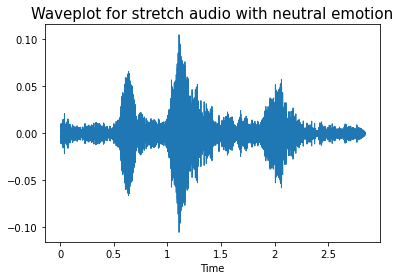

In [20]:
stretch_data = stretch(data, STRETCH_FACTOR)
create_waveplot(stretch_data, sample_rate, 'stretch', emotion)
ipd.Audio(stretch_data, rate = sample_rate)

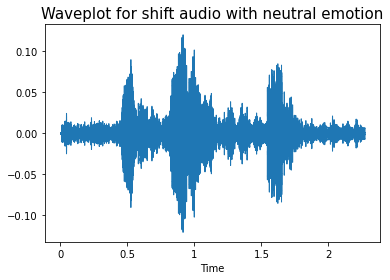

In [21]:
shift_data = shift(data, sample_rate, SHIFT_RANGE)
create_waveplot(shift_data, sample_rate, 'shift', emotion)
ipd.Audio(shift_data, rate = sample_rate)

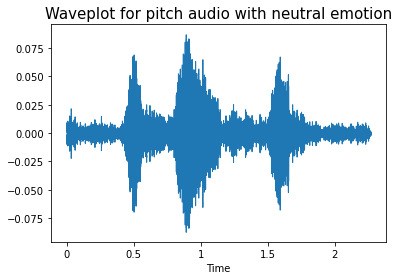

In [22]:
pitch_data = pitch(data, sample_rate, PITCH_FACTOR)
create_waveplot(pitch_data, sample_rate, 'pitch', emotion)
ipd.Audio(pitch_data, rate = sample_rate)

Feature Extraction

In [14]:
def extract_features(data, sample_rate):
    
    crema_feature_ar = np.array([])
    #zero crossing rate
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    #chromagram
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    #mfcc
    mfcc = np.abs(np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0))
    #root mean square
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    #MelSpectrogram
    mel_S = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    #Spectral Centroid
    spec_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)
    #Spectral Bandwidth
    spec_bandwidth = np.abs(np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sample_rate).T, axis=0))
    crema_feature_ar = np.hstack((crema_feature_ar, 
                                    chroma_stft,
                                    mfcc,
                                    rms,
                                    mel_S,
                                    zero_crossing_rate,
                                    spec_centroid,
                                    spec_bandwidth))

    return crema_feature_ar

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    crema_features_ar = extract_features(data, sample_rate=sample_rate)
    crema_data_features = np.array(crema_features_ar)
    
    # data with noise
    noise_data = noise(data, NOISE_FACTOR)
    res2 = extract_features(noise_data, sample_rate=sample_rate)
    crema_data_features = np.vstack((crema_data_features, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data, STRETCH_FACTOR)
    data_stretch_pitch = pitch(data, sample_rate, PITCH_FACTOR)
    res3 = extract_features(data_stretch_pitch, sample_rate=sample_rate)
    crema_data_features = np.vstack((crema_data_features, res3)) # stacking vertically
    
    return crema_data_features

In [15]:
X_crema_df = []
y_crema_df = []
for path, emotion in zip(crema_df.path, crema_df.target_emotion):
    feature = get_features(path)
    for f in feature:
        X_crema_df.append(f)
        y_crema_df.append(emotion)

X_crema_df = pd.DataFrame(X_crema_df)
y_crema_df = pd.DataFrame(y_crema_df)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [17]:
# Apply filter method: SelectKBest with mutual information
k = 10
selector_filter = SelectKBest(score_func=mutual_info_classif, k=k)
selector_filter.fit(X_crema_df, y_crema_df)

selected_features_filter = np.where(selector_filter.get_support())[0]
print("Selected features (filter method):", selected_features_filter)

X_new_filter = selector_filter.transform(X_crema_df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Selected features (filter method): [ 12  32 110 112 113 114 115 116 117 119]


In [30]:
df = pd.DataFrame(X_new_filter)
df['target'] = y_crema_df
df.to_csv('df_processed.csv',index=False)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing sets
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(X_new_filter, y_crema_df, test_size=0.2, random_state=42)
""" X_train_wrapper, X_test_wrapper, y_train_wrapper, y_test_wrapper = train_test_split(X_new_wrapper, y, test_size=0.2, random_state=42)"""
# Standardize the features
scaler_filter = StandardScaler().fit(X_train_filter)
X_train_filter = scaler_filter.transform(X_train_filter)
X_test_filter = scaler_filter.transform(X_test_filter)

""" scaler_wrapper = StandardScaler().fit(X_train_wrapper)
X_train_wrapper = scaler_wrapper.transform(X_train_wrapper)
X_test_wrapper = scaler_wrapper.transform(X_test_wrapper) """

# Train models using selected features (using MLPClassifier as an example)
model_filter = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)
model_filter.fit(X_train_filter, y_train_filter)

""" model_wrapper = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)
model_wrapper.fit(X_train_wrapper, y_train_wrapper) """

# Test the models
y_pred_filter = model_filter.predict(X_test_filter)
""" y_pred_wrapper = model_wrapper.predict(X_test_wrapper) """

# Evaluate the models
print("Model performance (filter method):")
print(classification_report(y_test_filter, y_pred_filter))

""" print("Model performance (wrapper method):")
print(classification_report(y_test_wrapper, y_pred_wrapper)) """


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model performance (filter method):
              precision    recall  f1-score   support

       angry       0.77      0.66      0.71       754
       happy       0.51      0.45      0.48       742
     neutral       0.61      0.78      0.68       682

    accuracy                           0.63      2178
   macro avg       0.63      0.63      0.62      2178
weighted avg       0.63      0.63      0.62      2178



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


' print("Model performance (wrapper method):")\nprint(classification_report(y_test_wrapper, y_pred_wrapper)) '

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLP classifier and perform grid search with cross-validation
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5)
grid_search.fit(X_train_filter, y_train_filter)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Load the best hyperparameters and train a final model
best_params = grid_search.best_params_
best_mlp = MLPClassifier(**best_params, random_state=42)
best_mlp.fit(X_train_filter, y_train_filter)

# Test the final model
y_pred = best_mlp.predict(X_test_filter)

# Evaluate the final model
print("Final model performance:")
print(classification_report(y_test_filter, y_pred))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib

Best hyperparameters:  {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.001}
Best score:  0.62992341785967
Final model performance:
              precision    recall  f1-score   support

       angry       0.77      0.64      0.70       754
       happy       0.51      0.48      0.49       742
     neutral       0.62      0.77      0.68       682

    accuracy                           0.63      2178
   macro avg       0.63      0.63      0.63      2178
weighted avg       0.63      0.63      0.63      2178



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_crema_df)

/Users/hm/Documents/Github_Projects/soundemotionrecognitoin/myenv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv2D, MaxPooling2D, TimeDistributed, Flatten, Bidirectional
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new_filter, y_encoded, test_size=0.2, random_state=42)

input_shape = X_train[0].shape

# CNN Model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(le.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model((*input_shape, 1))

# CNN-LSTM Model
def create_cnn_lstm_model(input_shape):
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(le.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_lstm_model = create_cnn_lstm_model((*input_shape, 1))

# Reshape input data for CNN and CNN-LSTM models
X_train_cnn = np.array(X_train).reshape(len(X_train), *input_shape, 1)
X_test_cnn = np.array(X_test).reshape(len(X_test), *input_shape, 1)

# Train the CNN model
cnn_model.fit(X_train_cnn, np.array(y_train), epochs=20, batch_size=32, validation_data=(X_test_cnn, np.array(y_test)))

# Train the CNN-LSTM model
cnn_lstm_model.fit(X_train_cnn, np.array(y_train), epochs=20, batch_size=32, validation_data=(X_test_cnn, np.array(y_test)))

# Evaluate the CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, np.array(y_test), verbose=2)
print(f"CNN Test Loss: {cnn_test_loss}, CNN Test Accuracy: {cnn_test_acc}")

# Evaluate the CNN-LSTM model
cnn_lstm_test_loss, cnn_lstm_test_acc = cnn_lstm_model.evaluate(X_test_cnn, np.array(y_test), verbose=2)
print(f"CNN-LSTM Test Loss: {cnn_lstm_test_loss}, CNN-LSTM Test Accuracy: {cnn_lstm_test_acc}")

ModuleNotFoundError: No module named 'tensorflow'

In [283]:
features = get_features("/Users/hm/Downloads/11.m4a")
features = selector_filter.transform(features)[0]
array=features.reshape(1, -1)
features=scaler_filter.transform(array)
model_filter.predict(features)

/var/folders/s7/mgrhm82s2fg_546fj8k5kfk00000gn/T/ipykernel_20961/721294647.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)


array(['angry'], dtype='<U7')

In [85]:
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write

# Set the sampling frequency and recording duration
fs = 44100  # Hz
duration = 5  # seconds

# Set the RMS energy threshold
threshold = 0.01

# Record audio
print('Recording audio...')
audio = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()

# Calculate the RMS energy of the audio signal
rms = np.sqrt(np.mean(np.square(audio)))

# Check if there is any audio
if rms > threshold:
    print('Audio detected. Please wait while processing')
    
    # Save audio as WAV file
    write('my_audio.wav', fs, audio)

    # Load the audio file
    filename = 'my_audio.wav'

    # Play the audio file
    print('Playing audio...')
    display(ipd.Audio(filename, rate=fs))

    #extracting features from audio
    rec_features = get_features(filename)

    #filtering features with most importance
    filtered_audio = selector_filter.transform(rec_features[0].reshape(1, -1))

    display(model_filter.predict(filtered_audio))
    best_mlp.predict(filtered_audio)
else:
    print('No audio detected. Please try again')

Recording audio...
No audio detected. Please try again


In [34]:
df_full = X_crema_df.copy()
df_full['target'] = y_crema_df
df_full.to_csv('df_full_processed.csv')